In [1]:
import yt
import numpy as np
import matplotlib.pyplot as plt

In [117]:
ds = yt.load("../../Exec/Sod1D_Stochastic/plt00167")
ds.print_stats()
# ds.field_list

yt : [INFO     ] 2022-12-14 01:42:45,821 Parameters: current_time              = 5e-06
yt : [INFO     ] 2022-12-14 01:42:45,823 Parameters: domain_dimensions         = [64  1  1]
yt : [INFO     ] 2022-12-14 01:42:45,824 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2022-12-14 01:42:45,826 Parameters: domain_right_edge         = [1. 1. 1.]


level	# grids	       # cells	     # cells^3
----------------------------------------------
  0	     1	            64	             4
  1	     2	            72	             5
  2	     1	            24	             3
----------------------------------------------
   	     4	           160


t = 5.00000000e-06 = 5.00000000e-06 s = 1.58440439e-13 years

Smallest Cell:
	Width: 1.266e-27 Mpc Mpc
	Width: 1.266e-21 pc pc
	Width: 2.611e-16 AU AU
	Width: 3.906e-03 cm cm


In [146]:
gs = ds.index.select_grids(ds.index.max_level)
for grid in ds.index.grids:
    print(grid.LeftEdge, grid.RightEdge, grid.Level)

for lv in range(ds.index.max_level+1):
    gs = ds.index.select_grids(lv)
    for g in gs:
        lo = g.LeftEdge[0]
        hi = g.RightEdge[0]
        dx = (hi-lo)/g.size
        print(lv, ":", lo, hi, dx, g.get_global_startindex)
        plt.plot(np.arange(lo,hi,dx), g["rho_E"][:,0,0])

[0. 0. 0.] code_length [0.5 1.  1. ] code_length 0
[0.5 0.  0. ] code_length [1. 1. 1.] code_length 0
[0.25 0.   0.  ] code_length [0.4375 1.     1.    ] code_length 1
[0.4375 0.     0.    ] code_length [0.625 1.    1.   ] code_length 1
[0.625 0.    0.   ] code_length [0.8125 1.     1.    ] code_length 1
[0.28125 0.      0.     ] code_length [0.375 1.    1.   ] code_length 2
[0.6875 0.     0.    ] code_length [0.75 1.   1.  ] code_length 2


AttributeError: 'BoxlibGrid' object has no attribute 'size'

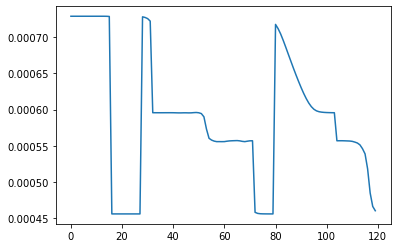

In [147]:
sl = ds.r[("boxlib", "density")]
plt.plot(sl)

In [101]:
# plot = yt.LinePlot(ds, [("boxlib", "density_Field0"),], (0,0,0), (1,0,0), 100)

# plot.set_x_unit("cm")
# plot.set_unit(("boxlib", "density"), "g/cm**3")
# plot.annotate_legend(("boxlib", "density"))

# plot.show()

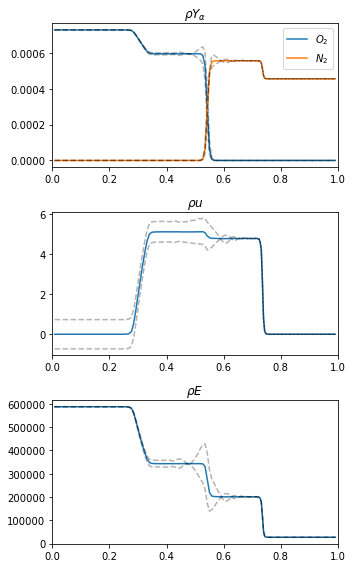

In [118]:
ax = 0  # take a line cut along the x axis
lineout = ds.ortho_ray(ax, (0, 0))
srt = np.argsort(lineout["index", "x"])

NUM_FIELD = 16

plt.figure(figsize=(5,8))
plt.subplot(311)
var_name = "rho_O2"
plt.plot(np.array(lineout["index", "x"][srt]), np.array(lineout["boxlib", var_name][srt]), label=r"$O_2$")
for i in [0, NUM_FIELD-1]:
    plt.plot(np.array(lineout["index", "x"][srt]), np.array(lineout["boxlib", var_name+"_Field"+str(i)][srt]), 'k--', alpha=0.3)
var_name = "rho_N2"
plt.plot(np.array(lineout["index", "x"][srt]), np.array(lineout["boxlib", var_name][srt]), label=r"$N_2$")
for i in [0, NUM_FIELD-1]:
    plt.plot(np.array(lineout["index", "x"][srt]), np.array(lineout["boxlib", var_name+"_Field"+str(i)][srt]), 'k--', alpha=0.3)
plt.xlim([0, 1])
plt.title(r"$\rho Y_\alpha$")
plt.legend()

var_name = "xmom"
plt.subplot(312)
plt.plot(np.array(lineout["index", "x"][srt]), np.array(lineout["boxlib", var_name][srt]))
for i in [0, NUM_FIELD-1]:
    plt.plot(np.array(lineout["index", "x"][srt]), np.array(lineout["boxlib", var_name+"_Field"+str(i)][srt]), 'k--', alpha=0.3)
plt.xlim([0, 1])
plt.title(r"$\rho u$")

var_name = "rho_E"
plt.subplot(313)
plt.plot(np.array(lineout["index", "x"][srt]), np.array(lineout["boxlib", var_name][srt]))
for i in [0, NUM_FIELD-1]:
    plt.plot(np.array(lineout["index", "x"][srt]), np.array(lineout["boxlib", var_name+"_Field"+str(i)][srt]), 'k--', alpha=0.3)
plt.xlim([0, 1])
plt.title(r"$\rho E$")

plt.tight_layout()

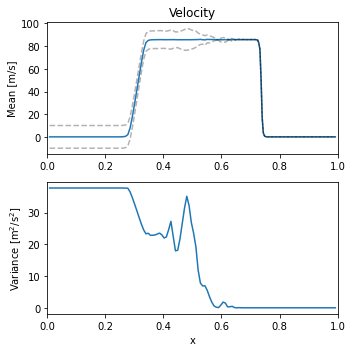

In [119]:
ax = 0  # take a line cut along the x axis
lineout = ds.ortho_ray(ax, (0, 0))
srt = np.argsort(lineout["index", "x"])

NUM_FIELD = 16
var_name = "xmom"

plt.figure(figsize=(5,5))
plt.subplot(211)
plt.plot(np.array(lineout["index", "x"][srt]), np.array(lineout["boxlib", var_name][srt])/np.array(lineout["boxlib", "density"][srt])/100)
for i in [0,NUM_FIELD-1]:#(NUM_FIELD):
    plt.plot(np.array(lineout["index", "x"][srt]), np.array(lineout["boxlib", var_name+"_Field"+str(i)][srt])/np.array(lineout["boxlib", "density_Field"+str(i)][srt])/100, 'k--', alpha=0.3)
plt.xlim([0, 1])
plt.ylabel("Mean [m/s]")
plt.title("Velocity")

variance = np.zeros_like(np.array(lineout["boxlib", var_name][srt]))
for i in range(NUM_FIELD):
    variance += (np.array(lineout["boxlib", var_name+"_Field"+str(i)][srt])/np.array(lineout["boxlib", "density_Field"+str(i)][srt]) - np.array(lineout["boxlib", var_name][srt])/np.array(lineout["boxlib", "density"][srt]))**2 / NUM_FIELD
plt.subplot(212)
plt.plot(np.array(lineout["index", "x"][srt]), variance/100**2)
plt.xlim([0, 1])
plt.xlabel("x")
plt.ylabel(r"Variance [m$^2$/s$^2$]")

plt.tight_layout()